Music Genre Classification for All Features on 10 genre dataset and 5 genre dataset

In [168]:
# importing required python packages
from itertools import cycle

from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score,f1_score,precision_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.svm import SVC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Reading the Dataset

In [169]:
# Reading extracted feature dataset into dataframe
dataset = pd.read_csv('data_set.csv')

Generating Training and Test Dataset

In [171]:
# Generating test and train dataset by using train_test_split
no_of_cols = dataset.shape[1] - 1
X = dataset.iloc[:, :no_of_cols]
y = dataset.iloc[:, no_of_cols]
genres = list(y.unique())
genre_label = {genre: genres.index(genre) for genre in genres}
y = y.map(genre_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Function to generate and plot Confusion Matrix and to plot ROC Curve

In [176]:
# function to plot confusion matrix
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# function to generate confusion matrix
def plot_cnf(true_y,y_pred,GENRES):
    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,y_pred)
    plt.figure()
    confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

# function to generate ROC curve
def plot_roc(y_test, pred_proba,c):
    y_test = label_binarize(y_test, classes=c)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(c)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'blue', 'orange', 'red', 'purple', 'brown', 'olive', 'gray'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.0,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i+1, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', lw=1.0)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC for Music Genre')
    plt.legend(loc="lower right")
    plt.show()

Classifier function that prints confusion matrix, accuracy and ROC Curve

In [177]:
def classifier(type):
    if type == "mlp":
        clf = MLPClassifier(activation = 'identity', hidden_layer_sizes = (15,), solver = 'lbfgs', learning_rate = 'constant', alpha = 0.05)
    elif type == "svc":
        clf = SVC(C = 1, decision_function_shape = "ovo", gamma = 1, kernel = "poly", shrinking = True, probability = True)
    elif type == "rfc":
        clf = RFC(criterion="entropy",max_depth=8,max_features ="auto",n_estimators=500)
    scores = cross_val_score(clf, X_train, y_train, cv=5)
    print("Cross-validated scores for " + type + " : ", scores)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print("Accuracy: ", accuracy)
    plot_cnf(y_test, predictions, genres)
    plot_roc(y_test, pred_proba, list(genre_label.values()))
    

MLP Classifier on all genre dataset

Cross-validated scores for mlp :  [0.57055215 0.66871166 0.59375    0.58860759 0.53846154]
Accuracy:  0.615


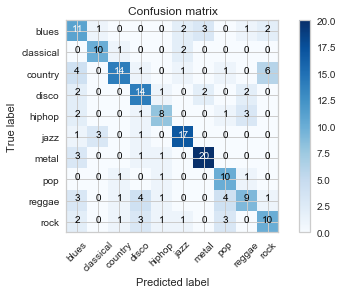

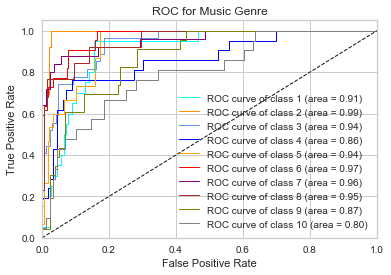

In [180]:
classifier("mlp")

SVC Classifier on all genre dataset

Cross-validated scores for svc :  [0.58895706 0.66871166 0.625      0.60759494 0.66025641]
Accuracy:  0.62


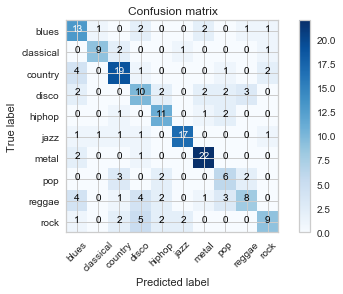

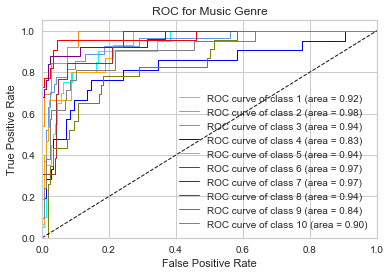

In [181]:
classifier("svc")

RFC Classifier on all genre dataset

Cross-validated scores for rfc :  [0.56441718 0.58282209 0.61875    0.62025316 0.57692308]
Accuracy:  0.59


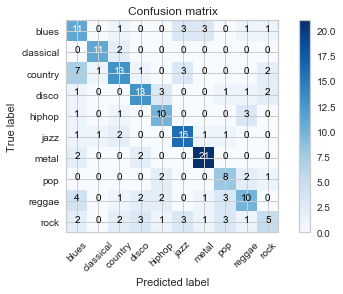

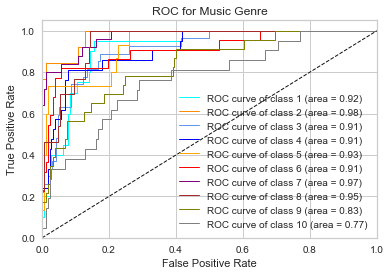

In [182]:
classifier("rfc")

Loading dataset for only 5 genre

In [183]:
dataset = dataset[dataset['genre'].isin (['metal','classical','hiphop','pop','jazz'])]

Obtaining Train and Test Dataset

In [184]:
no_of_cols = dataset.shape[1] - 1
X = dataset.iloc[:, :no_of_cols]
y = dataset.iloc[:, no_of_cols]
genres = list(y.unique())
genre_label = {genre: genres.index(genre) for genre in genres}
y = y.map(genre_label)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

MLP Classifier on 5 genre dataset

Cross-validated scores for mlp :  [0.78313253 0.825      0.78481013 0.83544304 0.78481013]
Accuracy:  0.8


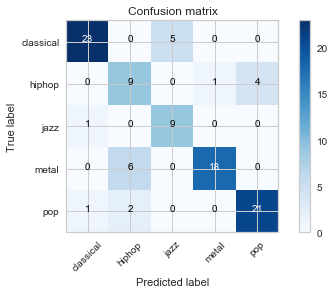

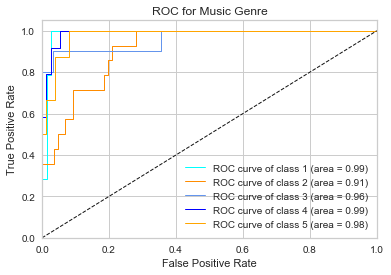

In [185]:
classifier("mlp")

SVC Classifier on 5 genre dataset

Cross-validated scores for svc :  [0.81927711 0.8375     0.78481013 0.83544304 0.84810127]
Accuracy:  0.88


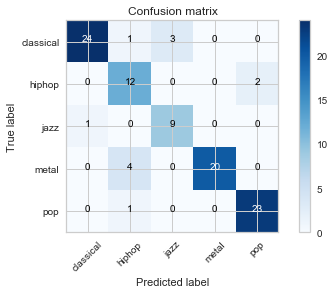

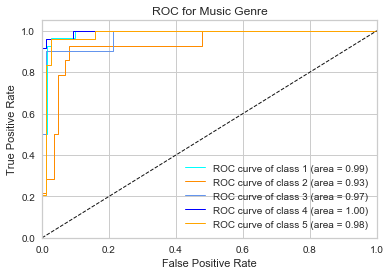

In [186]:
classifier("svc")

RFC Classifier on 5 genre dataset

Cross-validated scores for rfc :  [0.81927711 0.8        0.75949367 0.87341772 0.86075949]
Accuracy:  0.86


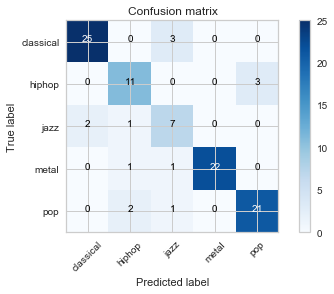

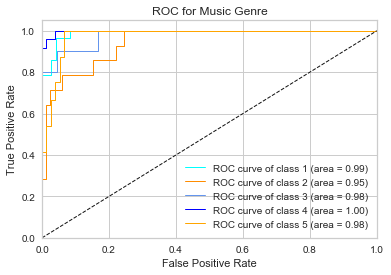

In [187]:
classifier("rfc")